# 核心能力提升班商业智能方向 004期 Week 13

### Thinking 1: KNN与KMeans中的K分别代表什么？

KNN中的K是指待分类样本点X附近的K个数据点中占比最多的类别是X的分类类别。KMeans中的K是将数据集分类为K个类别。

### Thinking 2: 都有哪些常用的启发式算法？

常用的启发式算法有模拟退火算法（SA）、遗传算法（GA）、蚁群算法（ACO）、人工神经网络（ANN）等。  
1. 模拟退火算法(Simulated Annealing, SA)的思想借鉴于固体的退火原理，当固体的温度很高的时候，内能比较大，固体的内部粒子处于快速无序运动，当温度慢慢降低的过程中，固体的内能减小，粒子的慢慢趋于有序，最终，当固体处于常温时，内能达到最小，此时，粒子最为稳定。模拟退火算法便是基于这样的原理设计而成。
2. 遗传算法（Genetic Algorithm, GA）起源于对生物系统所进行的计算机模拟研究。它是模仿自然界生物进化机制发展起来的随机全局搜索和优化方法，借鉴了达尔文的进化论和孟德尔的遗传学说。其本质是一种高效、并行、全局搜索的方法，能在搜索过程中自动获取和积累有关搜索空间的知识，并自适应地控制搜索过程以求得最佳解。
3. 蚁群算法是模拟蚂蚁寻找食物的场景。蚂蚁有会随机选择一条路线。这条路线很可能是一条远路。但是，蚂蚁一路上留下了信息素。如果这只蚂蚁继续不停地搬运食物，或者有许多其他蚂蚁一块搬运的话。他们总会在运气好的时候走到更快往返的路线上。蚂蚁选择的路越好，相同时间内往返的次数也就更多，也就在路上留下了更多的信息素。于是，蚂蚁们总会发现，有一些路径的信息素更浓，这些路径就是更好的路线。于是蚂蚁也就更多地向信息素更浓的路径上偏移。蚂蚁们不停重复这个过程，最终总能找到一条确定的路线，而这条路线就是蚂蚁们找到的最优路径。

### Thinking 3: 遗传算法的原理是怎样的？

遗传算法（Genetic Algorithm, GA）起源于对生物系统所进行的计算机模拟研究。它是模仿自然界生物进化机制发展起来的随机全局搜索和优化方法，借鉴了达尔文的进化论和孟德尔的遗传学说。其本质是一种高效、并行、全局搜索的方法，能在搜索过程中自动获取和积累有关搜索空间的知识，并自适应地控制搜索过程以求得最佳解。  
遗传算法步骤：
1. 对潜在问题进行编码，初始化基因组，并根据基因组随机初始化种群，并指定繁衍代数。
2. 计算种群中每个个体的适应度，选择一定数目的留下，其余淘汰。
3. 在留下的个体中，随机繁衍，对分母基因进行交叉（极小概率变异），产生下一代。
4. 回到第2步进行循环。直到达到指定的繁衍代数

### Action 1: 基于能力描述的薪资预测：
数据集：抓取了4512个职位的能力描述，薪资  
Step1，数据加载  
Step2，可视化，使用Networkx  
Step3，提取文本特征 TFIDF  
Step4，回归分析，使用KNN回归，朴素贝叶斯回归，训练能力和薪资匹配模型  
Step5，基于指定的能力关键词，预测薪资  

### Step1，数据加载

In [1]:
# 引包
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# 数据加载
file = 'data/jobs_4k.xls'
content = pd.read_excel(file, index_col='id')
content.head()

,positionName,district,stationname,jobNature,companyLabelList,industryField,salary,companySize,skillLables,createTime,companyFullName,workYear,education,positionAdvantage,url,detail,type
id,,,,,,,,,,,,,,,,,
3,财务产品经理,海淀区,上地,全职,"['节日礼物', '年底双薪', '定期体检', '七险一金']","物流丨运输,软件开发",10k-15k,500-2000人,"['产品设计', '后台', 'B2B']",2020-05-15 15:10:02,北京福佑多多信息技术有限公司,1-3年,本科,福利待遇好、创业黑马、技术氛围好,https://www.lagou.com/jobs/7149613.html,岗位职责1、负责财务相关业务解决方案架构并主导与产品、技术等交付团队的对接，能够从完整的财务...,产品线
4,产品专家,海淀区,中关村,全职,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",企业服务,30k-50k,500-2000人,[],2020-05-16 08:23:06,北京拉勾网络技术有限公司,5-10年,本科,做好产品，给用户用,https://www.lagou.com/jobs/7056930.html,负责具体产品线的工作，完成用户价值。解决具体产品线的问题。产品线有策略、运营、基础产品流程等线,产品线
5,产品总监,海淀区,中关村,全职,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",企业服务,40k-75k,500-2000人,[],2020-05-16 08:23:06,北京拉勾网络技术有限公司,5-10年,本科,做好产品，给用户用,https://www.lagou.com/jobs/6982266.html,做出好产品，服务用户，实现用户价值。B端产品、C端产品、商业策略产品、运营产品等岗位，都有总...,产品线
6,联盟广告产品运营专家/专员-【商业化】,海淀区,东单,全职,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",文娱丨内容,20k-40k,2000人以上,['产品运营'],2020-05-15 19:35:13,北京达佳互联信息技术有限公司,5-10年,不限,扁平化管理 免费午餐晚餐下午茶,https://www.lagou.com/jobs/7112346.html,职位描述：1、负责快手联盟竞价广告的落地和运营，提升产品使用率和覆盖率； 2、深度分析广告预...,产品线
7,产品总监,海淀区,中关村,全职,"['领导好', '五险一金', '领军企业', '脑力密集型']","移动互联网,社交",20k-38k,15-50人,"['电商', '社交电商', '产品策划', '需求分析']",2020-05-16 09:15:16,北京领主科技有限公司,5-10年,本科,发展，创新,https://www.lagou.com/jobs/6864122.html,工作职责:1. 整体负责公司的产品功能规划、优化升级、实施工作； 2. 带领产品团队完成产品...,产品线


### Step2，可视化，使用Networkx

In [3]:
position_names = content['positionName'].tolist()
skill_labels = content['skillLables'].tolist()

In [4]:
skill_position_graph = defaultdict(list)
for p,s in zip(position_names, skill_labels):
    skill_position_graph[p] += eval(s)
# skill_position_graph

In [5]:
G = nx.Graph(skill_position_graph)
# 设置中文字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [6]:
# 以20个随机选取的工作岗位为例
sample_nodes = random.sample(position_names, k=20)
sample_nodes

['java开发工程师',
 '前端工程师',
 '云平台计费-java资深工程师/技术专家',
 'python开发工程师',
 'PHP研发工程师',
 '资深ui设计师',
 '高级测试工程师',
 'web前端开发工程师',
 '后台开发工程师/技术专家',
 '产品总监',
 'Java高级开发工程师',
 'JAVA/PHP开发工程师',
 'Python 后端开发（北京）',
 '软件测试工程师（黑盒测试）',
 'JAVA开发工程师',
 '高级运维开发工程师--ACFUN',
 'Python 开发工程师',
 '高级测试开发工程师',
 'mysql/分布式数据库运维管理',
 '后端开发工程师']

In [7]:
# 初始化节点（刚开始为随机的20个职位）
sample_nodes_connections = sample_nodes
# 给随机的2个职位，添加相关的技能
for p, skills in skill_position_graph.items():
    if p in sample_nodes:
        sample_nodes_connections += skills

D:\Anaconda3\envs\learnBI\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


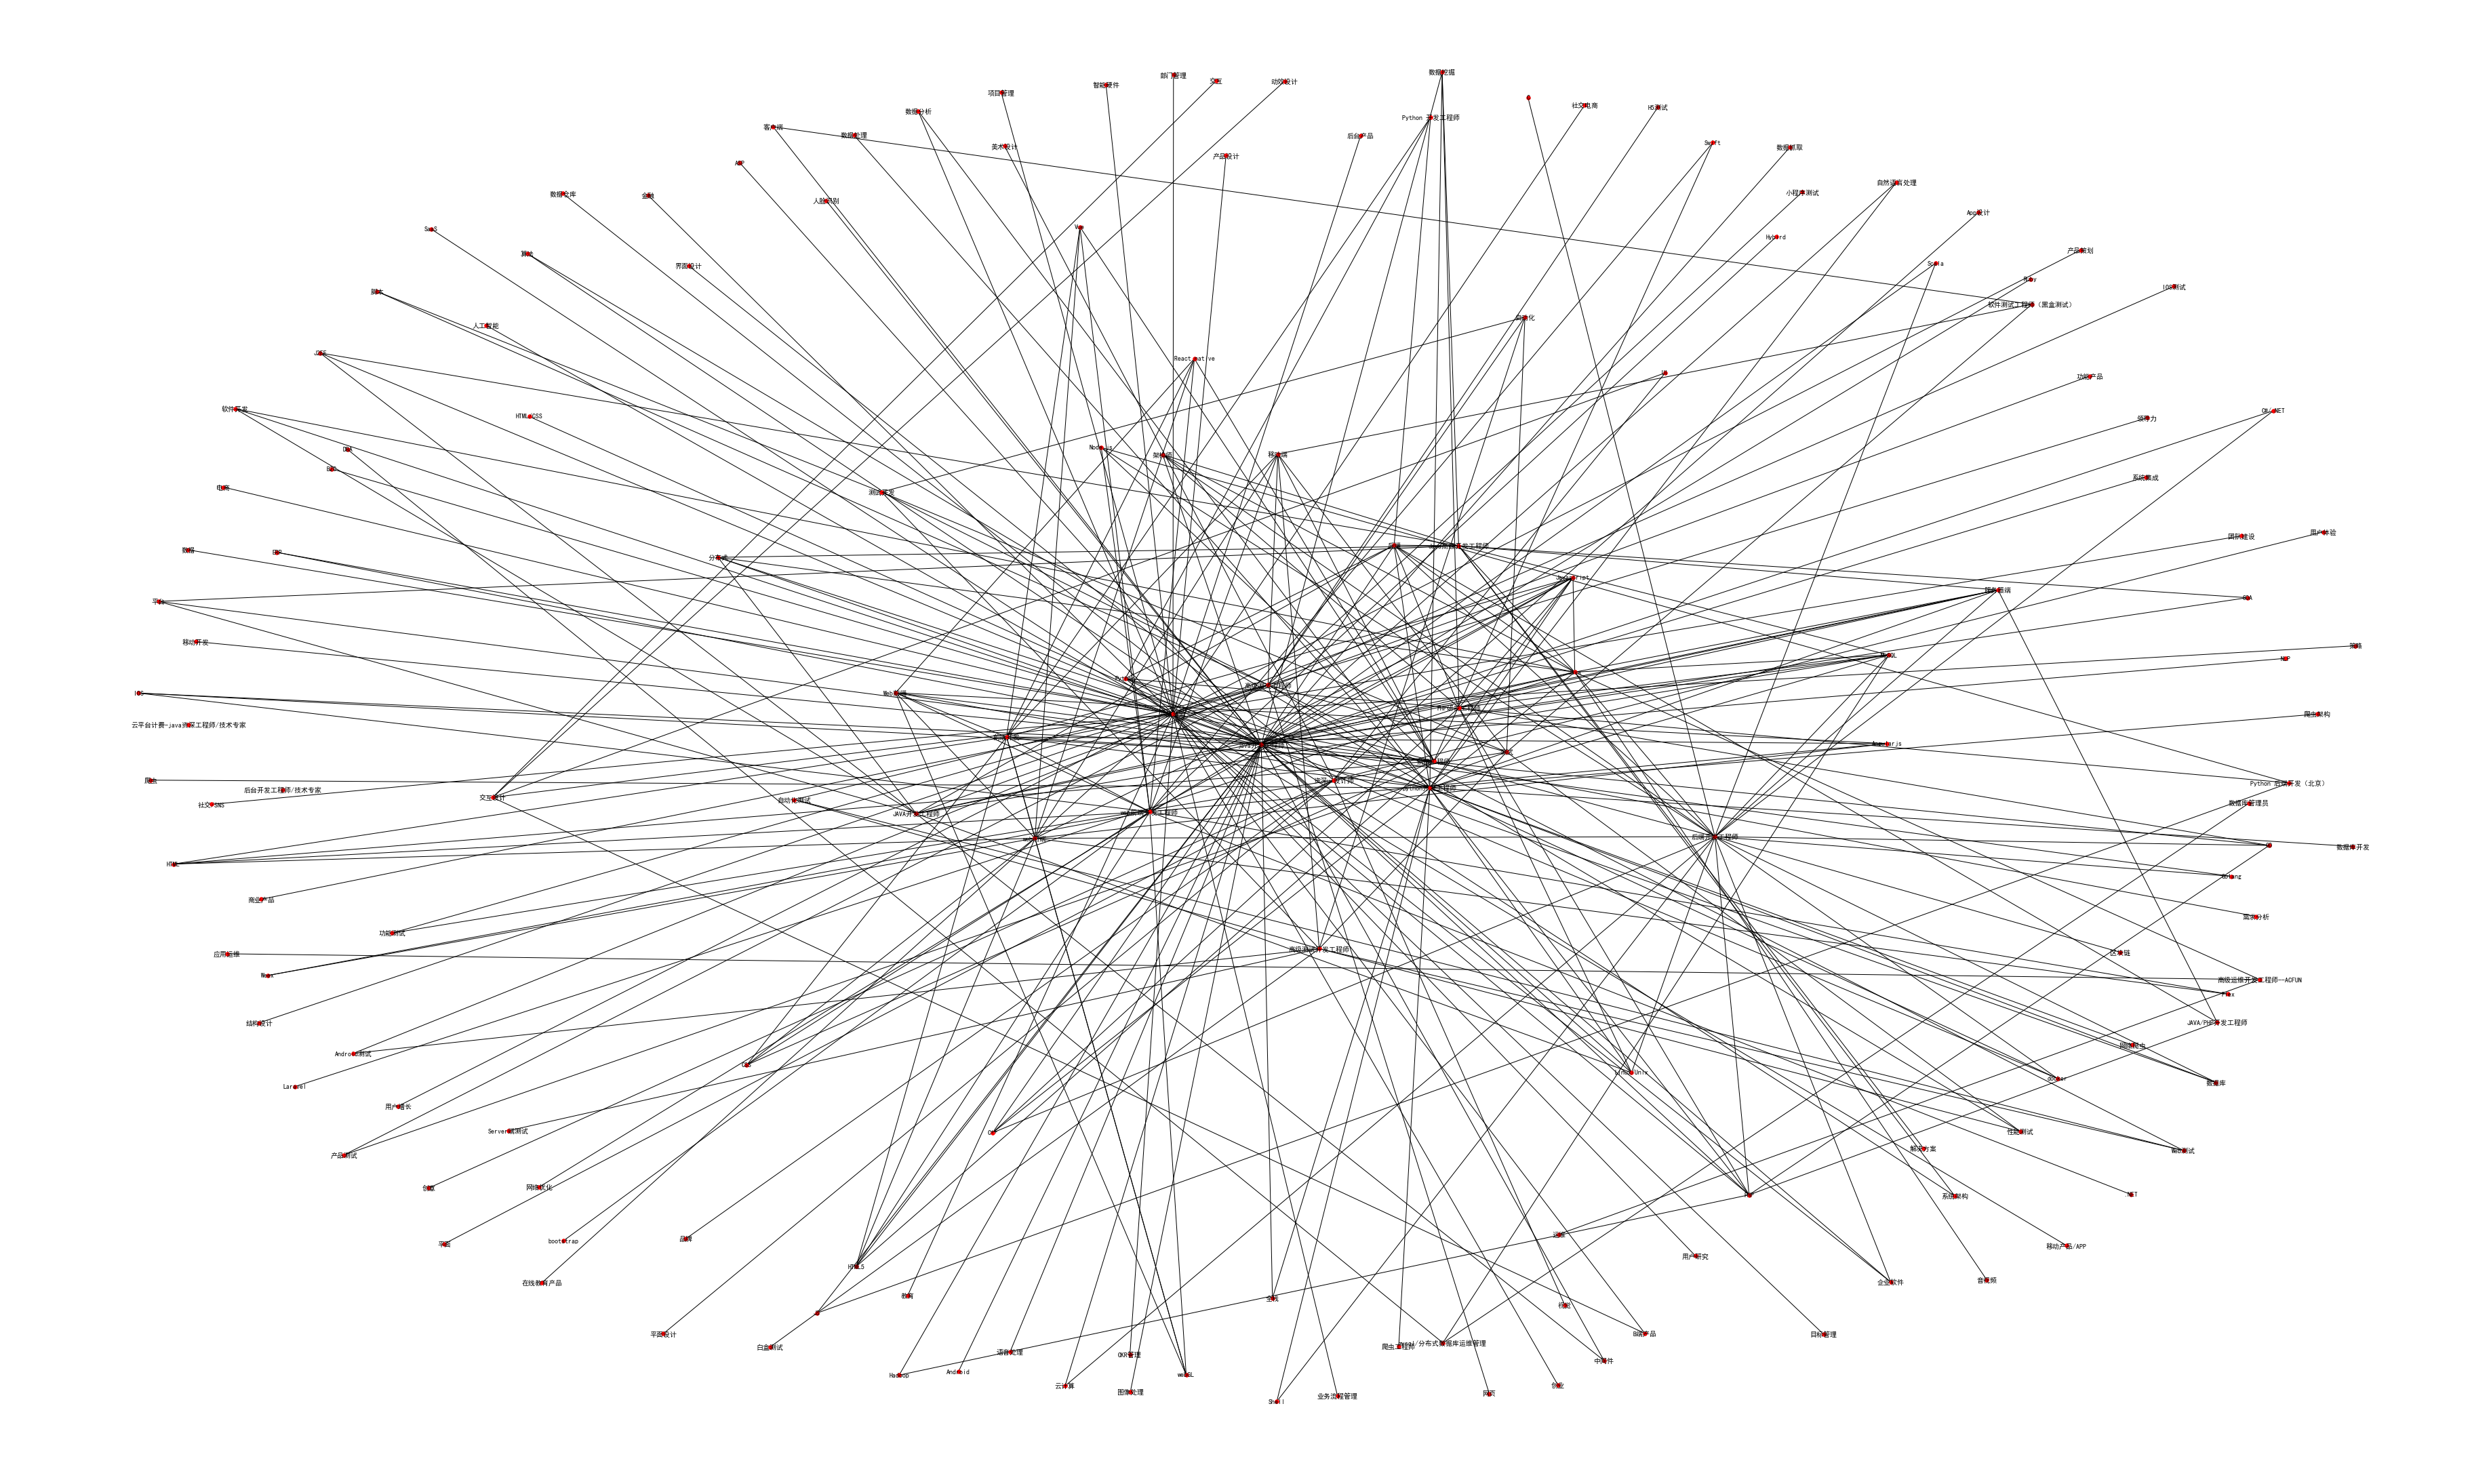

In [8]:
# 抽取G中的子图
sample_graph = G.subgraph(sample_nodes_connections)
plt.figure(figsize=(50, 30))
pos = nx.spring_layout(sample_graph, k=1)
nx.draw(sample_graph, pos, with_labels=True, node_size=30, font_size=10)
plt.show()

In [9]:
# 使用PageRank算法，对核心能力和核心职位进行影响力的排序
pr = nx.pagerank(G, alpha=0.9)
ranked_position_and_ability = sorted([(name, value) for name, value in pr.items()], key=lambda x:x[1], reverse=True)
ranked_position_and_ability[:5]# top 5

[('后端', 0.026833573370768898),
 ('运维', 0.0191279829833669),
 ('Python', 0.01716937562136133),
 ('PHP', 0.015217301132452196),
 ('Java', 0.015099988114363864)]

In [10]:
# 特征X 需要去掉salary字段
X_content = content.drop(['salary'], axis=1)
# 目标Target
target = content['salary'].tolist()

In [11]:
# 将X_content内容都拼接成字符串，设置为merged字段
X_content['merged'] = X_content.apply(lambda x: ''.join(str(x)), axis=1)
X_content['merged'][3]

"positionName                                                    财务产品经理\ndistrict                                                           海淀区\nstationname                                                         上地\njobNature                                                           全职\ncompanyLabelList                      ['节日礼物', '年底双薪', '定期体检', '七险一金']\nindustryField                                               物流丨运输,软件开发\ncompanySize                                                  500-2000人\nskillLables                                      ['产品设计', '后台', 'B2B']\ncreateTime                                         2020-05-15 15:10:02\ncompanyFullName                                         北京福佑多多信息技术有限公司\nworkYear                                                          1-3年\neducation                                                           本科\npositionAdvantage                                     福利待遇好、创业黑马、技术氛围好\nurl                            https://www.lagou.com/jobs/71496

In [12]:
import jieba
import re

In [13]:
# 合并在一起
def get_one_row_job_string(x_string_row):
    job_string = ''
    for i, element in enumerate(x_string_row.split('\n')):
        if len(element.split()) == 2:
            _, value = element.split()
            job_string += value
    return job_string

In [14]:
# 正则表达式匹配
def token(string):
    return re.findall('\w+', string)

In [15]:
X_string = X_content['merged'].tolist()

In [16]:
cutted_X = []
for i, row in enumerate(X_string):
    job_string = get_one_row_job_string(row)
    cutted_X.append(' '.join(list(jieba.cut(' '.join(token(job_string))))))


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LinWang\AppData\Local\Temp\jieba.cache
Loading model cost 0.537 seconds.
Prefix dict has been built succesfully.


### Step3，提取文本特征 TFIDF

In [17]:
# 使用TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cutted_X)

In [18]:
target_numical = [np.mean(list(map(float, re.findall('\d+', s)))) for s in target]
Y = target_numical

### Step4，回归分析，使用KNN回归，训练能力和薪资匹配模型

In [19]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

### Step5，基于指定的能力关键词，预测薪资

In [20]:
# 预测薪资
def predict_by_label(test_string, model):
    # 分词
    test_words = list(jieba.cut(test_string))
    # 转换为TF-IDF向量
    test_vec = vectorizer.transform(test_words)
    # 模型预测
    y_pred = model.predict(test_vec)
    return y_pred[0]

In [21]:
test = '测试 北京 3年 专科'

In [22]:
predict_by_label(test, model)

10.75

In [23]:
test_list = ['测试 北京 3年 专科',
             '测试 北京 4年 专科',
             '算法 北京 4年 本科',
             'UI 北京 4年 本科',
             "广州Java本科3年掌握大数据",
             "沈阳Java硕士3年掌握大数据", 
             "沈阳Java本科3年掌握大数据", 
             "北京算法硕士3年掌握图像识别"]

In [24]:
for test in test_list:
    print(test, "预测薪资为：", predict_by_label(test, model), "K")

测试 北京 3年 专科 预测薪资为： 10.75 K
测试 北京 4年 专科 预测薪资为： 10.75 K
算法 北京 4年 本科 预测薪资为： 19.25 K
UI 北京 4年 本科 预测薪资为： 13.75 K
广州Java本科3年掌握大数据 预测薪资为： 20.0 K
沈阳Java硕士3年掌握大数据 预测薪资为： 30.0 K
沈阳Java本科3年掌握大数据 预测薪资为： 30.0 K
北京算法硕士3年掌握图像识别 预测薪资为： 28.75 K
